In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import cleaning

<h3> Data Cleaning </h3>

In [2]:
df = cleaning.clean_raw()

<h2> Q1: are older customers better customers? </h2>

In [3]:
# create bins for age
df['age_bucket'] = pd.cut(df.age, bins=[0, 25, 30, 35, 40, 50, 80])

# group the data by sex and age bucket to calculate % of default contained in that bin
age_sex = df.groupby(['sex','age_bucket']).agg({'default':['count','mean']})


# reset the index again for slicing and plotting data
age_sex.reset_index(inplace=True)
age_sex.columns = age_sex.columns.get_level_values(0)

age_sex.columns = ['sex','age_bucket','counts','default%']
age_sex

,sex,age_bucket,counts,default%
0,1,"(0, 25]",1165,0.292704
1,1,"(25, 30]",2671,0.213403
2,1,"(30, 35]",2307,0.218032
3,1,"(35, 40]",2046,0.249267
4,1,"(40, 50]",2582,0.250968
5,1,"(50, 80]",1095,0.273059
6,2,"(0, 25]",2703,0.255642
7,2,"(25, 30]",4459,0.194438
8,2,"(30, 35]",3477,0.179177
9,2,"(35, 40]",2854,0.193763


In [4]:
# create a function to plot bar charts for default% for various slices, segments of data
def default_compare_plt(df, x, y, colour,i):
    df.plot(
    x = x, y= y, kind='bar', figsize=(8,6),
    title=f'Default% for {i} Customers', fontsize=12, color=colour, legend=False, ylim=(0,0.3)
);

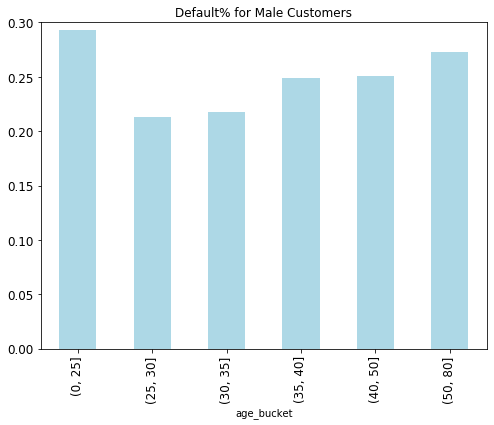

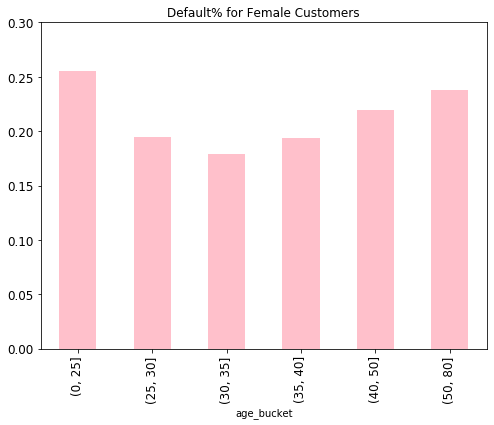

In [5]:
default_compare_plt(age_sex[age_sex['sex'] == 1],'age_bucket','default%','lightblue','Male')
default_compare_plt(age_sex[age_sex['sex'] == 2],'age_bucket','default%','pink','Female')

<h2> Q2: are customers with higher education better customers? </h2>

In [6]:
edu_sex = df.groupby(['sex','education']).agg({'default':['count','mean']})

# reset the index again for slicing and plotting data
edu_sex.reset_index(inplace=True)
edu_sex.columns = age_sex.columns.get_level_values(0)

edu_sex.columns = ['sex','education','counts','default%']
edu_sex

,sex,education,counts,default%
0,1,1,4353,0.208132
1,1,2,5373,0.262051
2,1,3,1978,0.274520
3,1,4,162,0.086420
4,2,1,6228,0.181439
5,2,2,8651,0.222055
6,2,3,2895,0.238342
7,2,4,292,0.065068


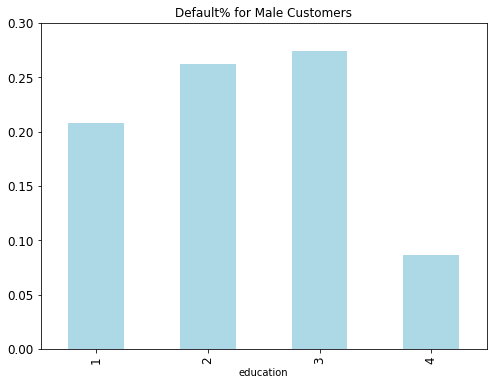

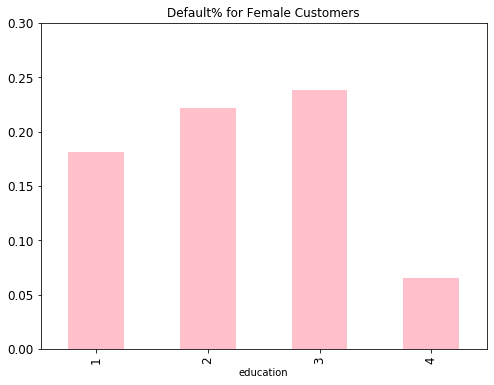

In [7]:
default_compare_plt(edu_sex[edu_sex['sex'] == 1],'education','default%','lightblue','Male')
default_compare_plt(edu_sex[edu_sex['sex'] == 2],'education','default%','pink','Female')


<h2> Q3: are married customers better customers? </h2>

In [8]:
marr = df.groupby(['marriage']).agg({'default':['count','mean'], 'age':'mean','education':'mean'})
marr.reset_index(inplace=True)

marr.columns = ['marriage','counts','default%','avg_age','avg_education']
marr

,marriage,counts,default%,avg_age,avg_education
0,1,13655,0.234786,40.016917,1.970633
1,2,15954,0.209415,31.448163,1.719945
2,3,323,0.260062,42.798762,2.213622


<h2> Q4: are recent arrears more relevant than past arrears? </h2>

In [9]:
# change 3 and above to one bin?
arrears = df.groupby(['pay_0']).agg({'default':['count','mean']})

arrears.reset_index(inplace=True)
arrears.columns = ['arrear_status','count','default%']

In [10]:
for i in range(2,7):
    arr_temp = df.groupby([f'pay_{i}']).agg({'default':['count','mean']})
    arr_temp.reset_index(inplace=True)
    arr_temp.columns = ['arrear_status','count','default%']
    arrears = arrears.join(arr_temp['default%'],lsuffix=f'_{i-1}',rsuffix=f'_{i}')

In [11]:
arrears

,arrear_status,count,default%_1,default%_2,default%_3,default%_4,default%_5,default%_6
0,-2,2749,0.132412,0.183024,0.185749,0.192982,0.197130,0.200943
1,-1,5667,0.168343,0.160226,0.156472,0.159520,0.162471,0.170309
2,0,14713,0.128186,0.159259,0.174681,0.183351,0.188723,0.188576
3,1,3678,0.340131,0.178571,0.250000,0.500000,0.542541,0.507246
4,2,2663,0.692077,0.556775,0.516146,0.524611,0.638418,0.644809
5,3,322,0.757764,0.616564,0.579832,0.611111,0.607143,0.632653
6,4,76,0.684211,0.510204,0.578947,0.666667,0.588235,0.538462
7,5,25,0.520000,0.600000,0.571429,0.514286,0.750000,0.736842
8,6,11,0.545455,0.750000,0.608696,0.400000,0.827586,0.826087
9,7,9,0.777778,0.600000,0.814815,0.827586,1.000000,1.000000


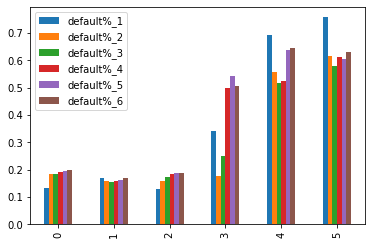

In [12]:
arrears.iloc[0:6,2:].plot(kind='bar');

<h3> Q5: Are people making smaller payments more likley to default?</h3>

In [16]:
# create bins for age
df['pay%_1_bin'] = pd.cut(df['pay%_1'], bins=[0, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.75, 1.0])

# group the data by sex and age bucket to calculate % of default contained in that bin
pay_bin = df.groupby(['pay%_1_bin']).agg({'default':['count','mean']})


# reset the index again for slicing and plotting data
pay_bin.reset_index(inplace=True)
pay_bin.columns = ['pay%1_bin','counts','default%']
pay_bin

# doesn't seem to have a relationship

,pay%1_bin,counts,default%
0,"(0.0, 0.05]",7437,0.205594
1,"(0.05, 0.1]",5243,0.224299
2,"(0.1, 0.2]",2656,0.234563
3,"(0.2, 0.3]",916,0.222707
4,"(0.3, 0.4]",458,0.174672
5,"(0.4, 0.5]",306,0.163399
6,"(0.5, 0.75]",408,0.156863
7,"(0.75, 1.0]",4377,0.161983
